In [2]:
import pandas as pd
amazon_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/lesson14/amazon_market_data.csv')
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 18  Profit        3312 non-null 

Предобработка данных

In [3]:
# Приведение столбцов в формат camelCase
def to_camel_case(column_name):
    parts = column_name.replace('(', '').replace(')', '').replace(' ', '').split('_')
    return parts[0].lower() + ''.join(word.title() for word in parts[1:])

amazon_df.columns = [to_camel_case(col) for col in amazon_df.columns]

print(amazon_df)

     orderdate  rowid         orderid        shipmode customerid      segment  \
0     01-01-20    849  CA-2017-107503  Standard Class   GA-14725     Consumer   
1     01-01-20   4010  CA-2017-144463  Standard Class   SC-20725     Consumer   
2     01-01-20   6683  CA-2017-154466     First Class   DP-13390  Home Office   
3     01-01-20   8070  CA-2017-151750  Standard Class   JM-15250     Consumer   
4     01-01-20   8071  CA-2017-151750  Standard Class   JM-15250     Consumer   
...        ...    ...             ...             ...        ...          ...   
3307  30-12-20    908  CA-2017-143259  Standard Class   PO-18865     Consumer   
3308  30-12-20    909  CA-2017-143259  Standard Class   PO-18865     Consumer   
3309  30-12-20   1297  CA-2017-115427  Standard Class   EB-13975    Corporate   
3310  30-12-20   1298  CA-2017-115427  Standard Class   EB-13975    Corporate   
3311  30-12-20   5092  CA-2017-156720  Standard Class   JM-15580     Consumer   

            country        

In [4]:
amazon_df.columns

Index(['orderdate', 'rowid', 'orderid', 'shipmode', 'customerid', 'segment',
       'country', 'city', 'state', 'postalcode', 'region', 'productid',
       'category', 'sub-category', 'productname', 'sales', 'quantity',
       'discount', 'profit'],
      dtype='object')

In [5]:
import pandas as pd

# Предполагаем, что amazon_df уже загружен
# amazon_df = pd.read_csv('path_to_your_file.csv')  # Пример загрузки

# Проверяем типы данных в датафрейме до преобразования
print("Типы данных до преобразования:")
print(amazon_df.dtypes)

# Преобразуем столбец 'orderdate' в формат datetime
amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'], errors='coerce')

# Проверяем типы данных в датафрейме после преобразования
print("\nТипы данных после преобразования:")
print(amazon_df.dtypes)

Типы данных до преобразования:
orderdate        object
rowid             int64
orderid          object
shipmode         object
customerid       object
segment          object
country          object
city             object
state            object
postalcode        int64
region           object
productid        object
category         object
sub-category     object
productname      object
sales           float64
quantity          int64
discount        float64
profit          float64
dtype: object

Типы данных после преобразования:
orderdate       datetime64[ns]
rowid                    int64
orderid                 object
shipmode                object
customerid              object
segment                 object
country                 object
city                    object
state                   object
postalcode               int64
region                  object
productid               object
category                object
sub-category            object
productname             object

<ipython-input-5-706d3f414b27>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'], errors='coerce')


In [6]:
amazon_df

,orderdate,rowid,orderid,shipmode,customerid,segment,country,city,state,postalcode,region,productid,category,sub-category,productname,sales,quantity,discount,profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279
3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,10009,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910
3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188
3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,94533,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750


In [7]:
# Удаление дубликатов
amazon_df = amazon_df.drop_duplicates()

# Удаление строк с пропусками
amazon_df = amazon_df.dropna()

# Проверим изменения
print(f"Размер датафрейма после обработки: {amazon_df.shape}")

Размер датафрейма после обработки: (3312, 19)


Исследовательский анализ данных

In [8]:
import pandas as pd

# Проверяем названия столбцов для консистентности (если нужно)
amazon_df.columns = amazon_df.columns.str.lower()

# Подсчет уникальных заказов и клиентов
unique_orders = amazon_df['orderid'].nunique()  # Количество уникальных заказов
unique_customers = amazon_df['customerid'].nunique()  # Количество уникальных клиентов

print(f"Количество уникальных заказов: {unique_orders}")
print(f"Количество уникальных клиентов: {unique_customers}")

Количество уникальных заказов: 1687
Количество уникальных клиентов: 693


<ipython-input-9-130518f27f9e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_orders.index, y=region_orders.values, palette='Blues_d')
<ipython-input-9-130518f27f9e>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='Greens_d')
<ipython-input-9-130518f27f9e>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='Oranges_d')


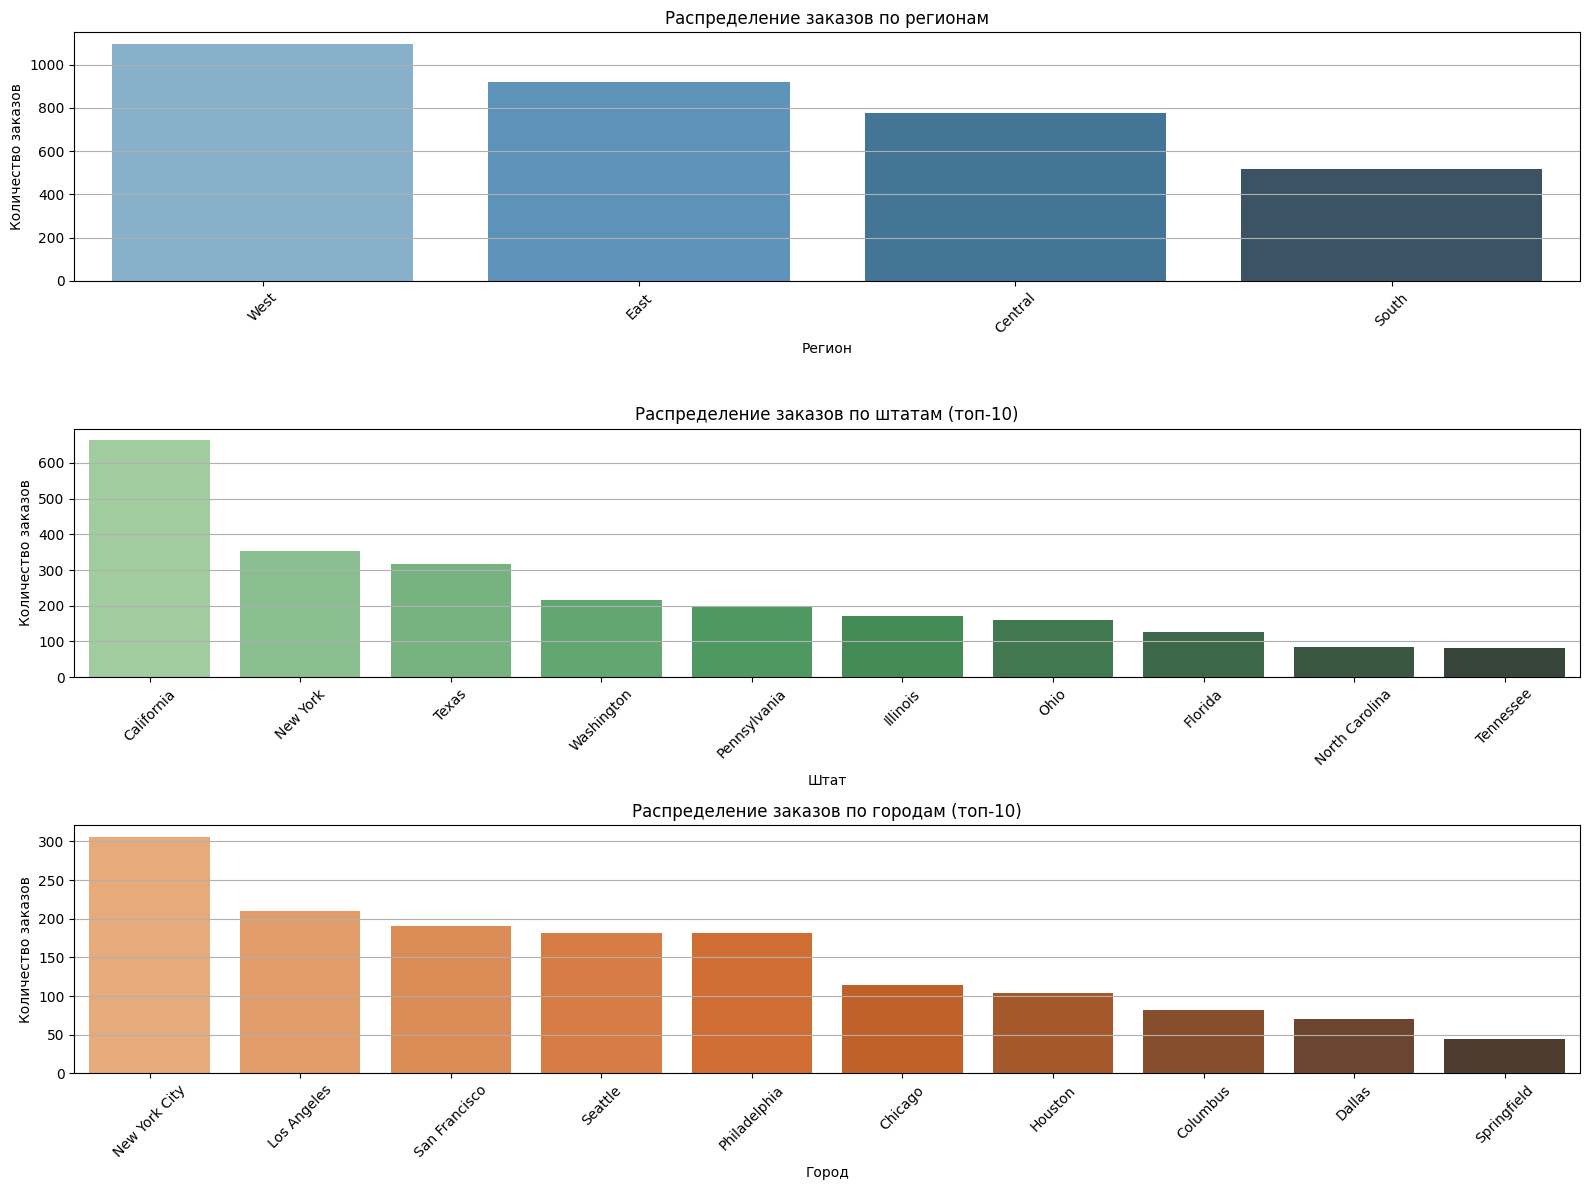

Комментарий:
1. Больше всего заказов поступает из региона 'West', меньше всего — из региона 'South'.
2. Штат с наибольшим количеством заказов — 'California'.
3. Город с наибольшим количеством заказов — 'New York City'.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру (на случай несоответствий)
amazon_df.columns = amazon_df.columns.str.lower()

# Подсчет количества заказов по регионам, штатам и городам
region_orders = amazon_df['region'].value_counts()
state_orders = amazon_df['state'].value_counts()
city_orders = amazon_df['city'].value_counts()

# Настройка размера графиков
plt.figure(figsize=(16, 12))

# Построение графика для регионов
plt.subplot(3, 1, 1)
sns.barplot(x=region_orders.index, y=region_orders.values, palette='Blues_d')
plt.title('Распределение заказов по регионам')
plt.ylabel('Количество заказов')
plt.xlabel('Регион')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Построение графика для штатов
plt.subplot(3, 1, 2)
top_states = state_orders.head(10)  # Для наглядности берем топ-10 штатов
sns.barplot(x=top_states.index, y=top_states.values, palette='Greens_d')
plt.title('Распределение заказов по штатам (топ-10)')
plt.ylabel('Количество заказов')
plt.xlabel('Штат')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Построение графика для городов
plt.subplot(3, 1, 3)
top_cities = city_orders.head(10)  # Для наглядности берем топ-10 городов
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Oranges_d')
plt.title('Распределение заказов по городам (топ-10)')
plt.ylabel('Количество заказов')
plt.xlabel('Город')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Добавление текстового комментария
most_orders_region = region_orders.idxmax()
least_orders_region = region_orders.idxmin()
most_orders_state = state_orders.idxmax()
most_orders_city = city_orders.idxmax()

print(f"Комментарий:")
print(f"1. Больше всего заказов поступает из региона '{most_orders_region}', меньше всего — из региона '{least_orders_region}'.")
print(f"2. Штат с наибольшим количеством заказов — '{most_orders_state}'.")
print(f"3. Город с наибольшим количеством заказов — '{most_orders_city}'.")

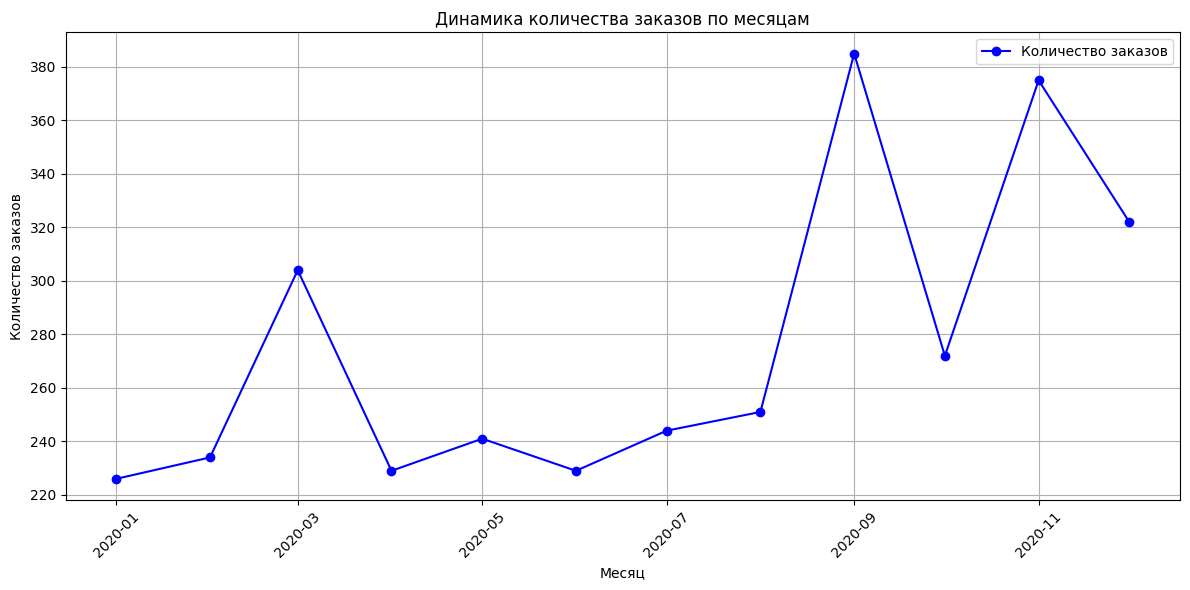

Комментарий:
1. Месяц с наибольшим количеством заказов: 2020-09 (385 заказов).
2. Месяц с наименьшим количеством заказов: 2020-01 (226 заказов).
3. Визуально заметно рост количества заказов в течение рассматриваемого периода.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Преобразование столбца 'orderdate' в формат datetime
amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'], errors='coerce')

# Группировка данных по месяцу и подсчет количества заказов
monthly_orders = (
    amazon_df.groupby(amazon_df['orderdate'].dt.to_period('M'))
    .size()
    .reset_index(name='order_count')
)

# Преобразование периода обратно в формат datetime для визуализации
monthly_orders['orderdate'] = monthly_orders['orderdate'].dt.to_timestamp()

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_orders['orderdate'],
    monthly_orders['order_count'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Количество заказов'
)
plt.title('Динамика количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ тренда
max_orders_month = monthly_orders.loc[monthly_orders['order_count'].idxmax()]
min_orders_month = monthly_orders.loc[monthly_orders['order_count'].idxmin()]

print(f"Комментарий:")
print(f"1. Месяц с наибольшим количеством заказов: {max_orders_month['orderdate'].strftime('%Y-%m')} ({max_orders_month['order_count']} заказов).")
print(f"2. Месяц с наименьшим количеством заказов: {min_orders_month['orderdate'].strftime('%Y-%m')} ({min_orders_month['order_count']} заказов).")
print(f"3. Визуально заметно {'рост' if max_orders_month['order_count'] > min_orders_month['order_count'] else 'падение'} количества заказов в течение рассматриваемого периода.")

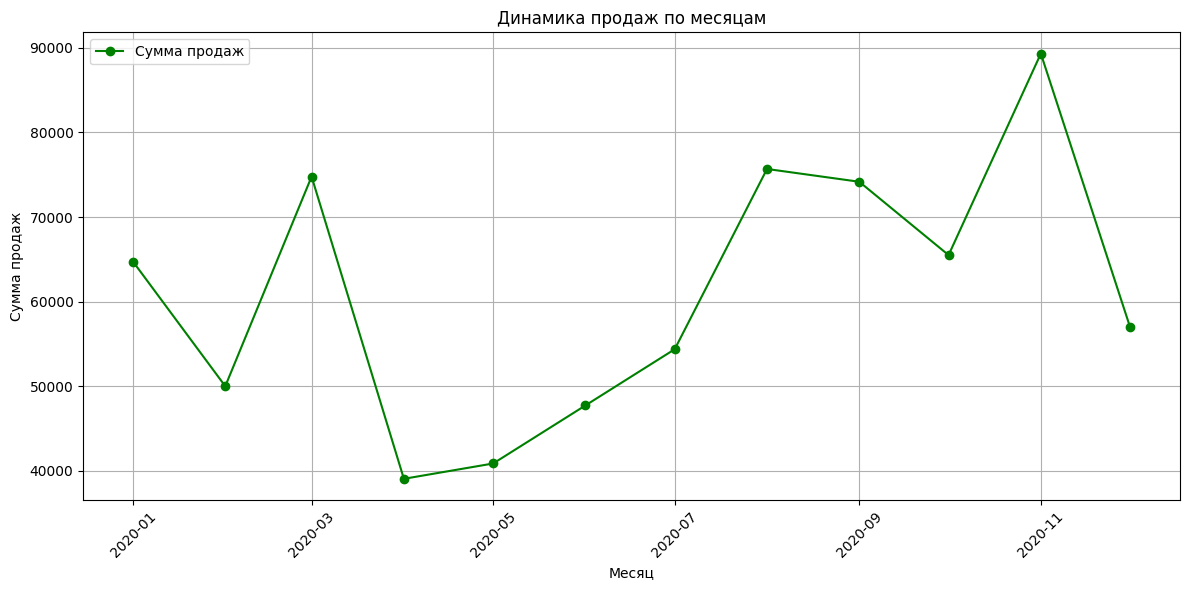

Комментарий:
1. Месяц с наибольшей суммой продаж: 2020-11 (сумма продаж: 89306.24).
2. Месяц с наименьшей суммой продаж: 2020-04 (сумма продаж: 39072.00).
3. Общее поведение продаж показало рост в течение рассматриваемого периода.


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Преобразование столбца 'orderdate' в формат datetime
amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'], errors='coerce')

# Преобразование 'sales' в числовой тип
amazon_df['sales'] = pd.to_numeric(amazon_df['sales'], errors='coerce')

# Группировка данных по месяцу и суммирование продаж
monthly_sales = (
    amazon_df.groupby(amazon_df['orderdate'].dt.to_period('M'))['sales']
    .sum()
    .reset_index()
)

# Преобразование периода обратно в формат datetime для визуализации
monthly_sales['orderdate'] = monthly_sales['orderdate'].dt.to_timestamp()

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(
    monthly_sales['orderdate'],
    monthly_sales['sales'],
    marker='o',
    linestyle='-',
    color='green',
    label='Сумма продаж'
)
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма продаж')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Анализ тренда
max_sales_month = monthly_sales.loc[monthly_sales['sales'].idxmax()]
min_sales_month = monthly_sales.loc[monthly_sales['sales'].idxmin()]

print(f"Комментарий:")
print(f"1. Месяц с наибольшей суммой продаж: {max_sales_month['orderdate'].strftime('%Y-%m')} (сумма продаж: {max_sales_month['sales']:.2f}).")
print(f"2. Месяц с наименьшей суммой продаж: {min_sales_month['orderdate'].strftime('%Y-%m')} (сумма продаж: {min_sales_month['sales']:.2f}).")
print(f"3. Общее поведение продаж показало {'рост' if max_sales_month['sales'] > min_sales_month['sales'] else 'падение'} в течение рассматриваемого периода.")

<ipython-input-13-eef99cde3e3f>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")
<ipython-input-13-eef99cde3e3f>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.index, y=top_subcategories.values, palette="Greens_d")


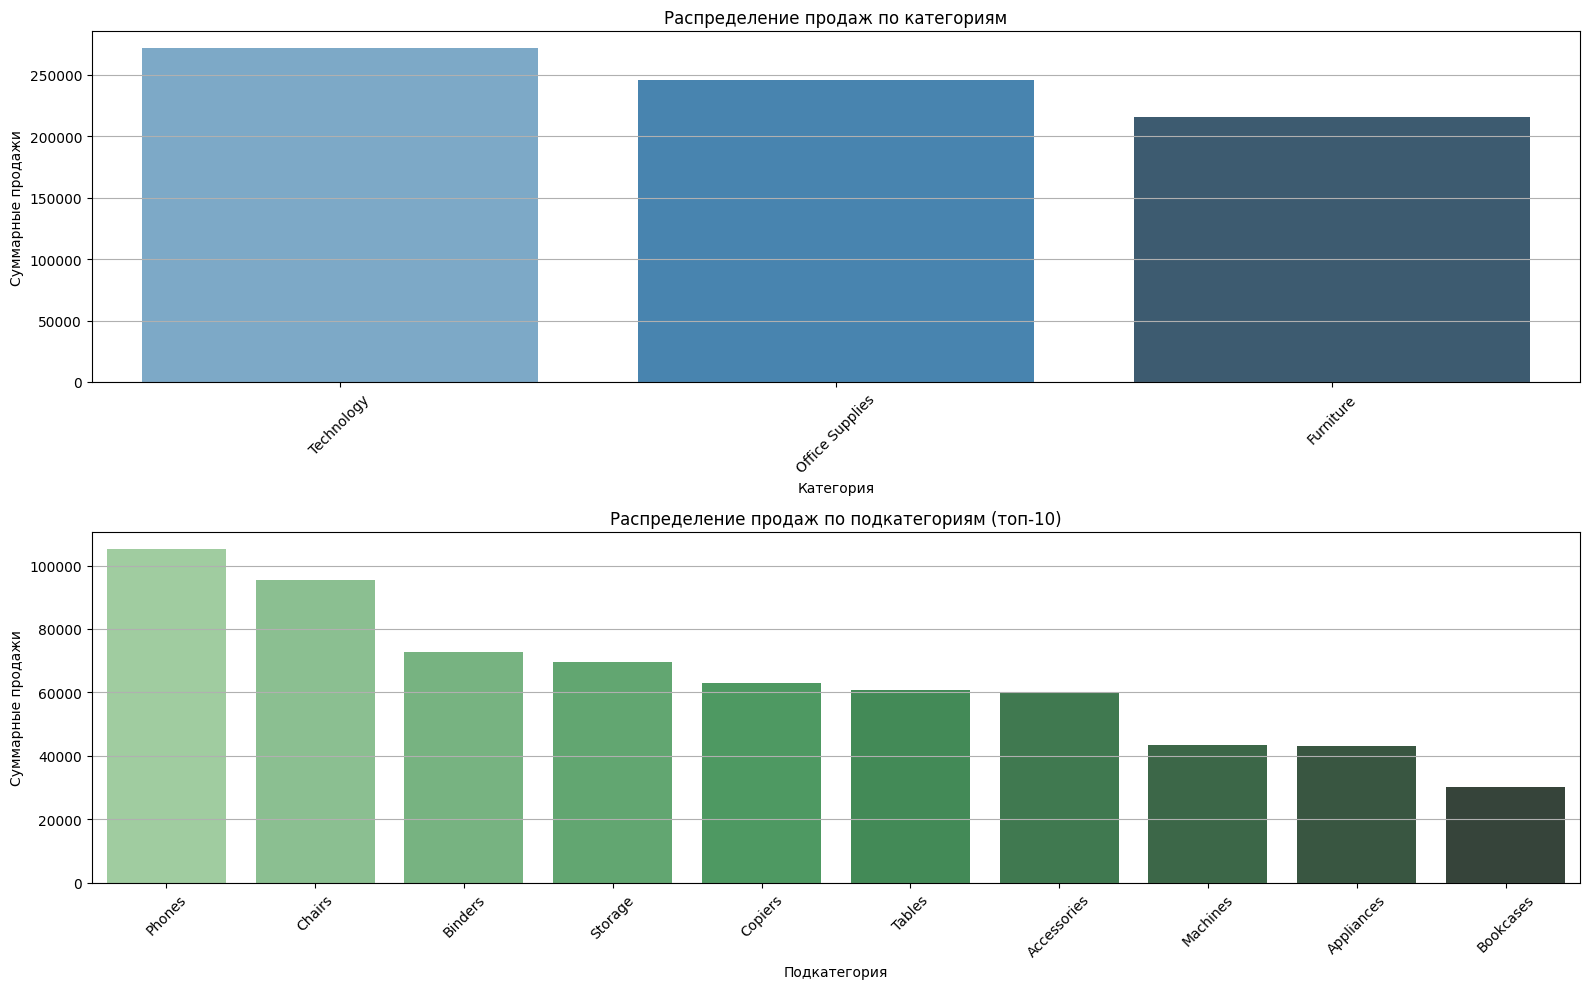

Комментарий:
1. Лидирующая категория по продажам: 'Technology' (сумма продаж: 271730.81).
2. Категория с наименьшими продажами: 'Furniture' (сумма продаж: 215387.27).
3. Лидирующая подкатегория по продажам: 'Phones' (сумма продаж: 105340.52).
4. Подкатегория с наименьшими продажами: 'Fasteners' (сумма продаж: 857.59).


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Преобразование 'sales' в числовой тип
amazon_df['sales'] = pd.to_numeric(amazon_df['sales'], errors='coerce')

# Создание сводной таблицы
category_sales = amazon_df.groupby('category')['sales'].sum().sort_values(ascending=False)
subcategory_sales = amazon_df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)

# Построение графиков
plt.figure(figsize=(16, 10))

# График для категорий
plt.subplot(2, 1, 1)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="Blues_d")
plt.title('Распределение продаж по категориям')
plt.xlabel('Категория')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График для подкатегорий (топ-10 для наглядности)
plt.subplot(2, 1, 2)
top_subcategories = subcategory_sales.head(10)
sns.barplot(x=top_subcategories.index, y=top_subcategories.values, palette="Greens_d")
plt.title('Распределение продаж по подкатегориям (топ-10)')
plt.xlabel('Подкатегория')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Анализ данных
top_category = category_sales.idxmax()
bottom_category = category_sales.idxmin()

top_subcategory = subcategory_sales.idxmax()
bottom_subcategory = subcategory_sales.idxmin()

print(f"Комментарий:")
print(f"1. Лидирующая категория по продажам: '{top_category}' (сумма продаж: {category_sales[top_category]:.2f}).")
print(f"2. Категория с наименьшими продажами: '{bottom_category}' (сумма продаж: {category_sales[bottom_category]:.2f}).")
print(f"3. Лидирующая подкатегория по продажам: '{top_subcategory}' (сумма продаж: {subcategory_sales[top_subcategory]:.2f}).")
print(f"4. Подкатегория с наименьшими продажами: '{bottom_subcategory}' (сумма продаж: {subcategory_sales[bottom_subcategory]:.2f}).")

<ipython-input-14-41fcf7f73f6a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
<ipython-input-14-41fcf7f73f6a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette='Greens_d')
<ipython-input-14-41fcf7f73f6a>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='Oranges_d')


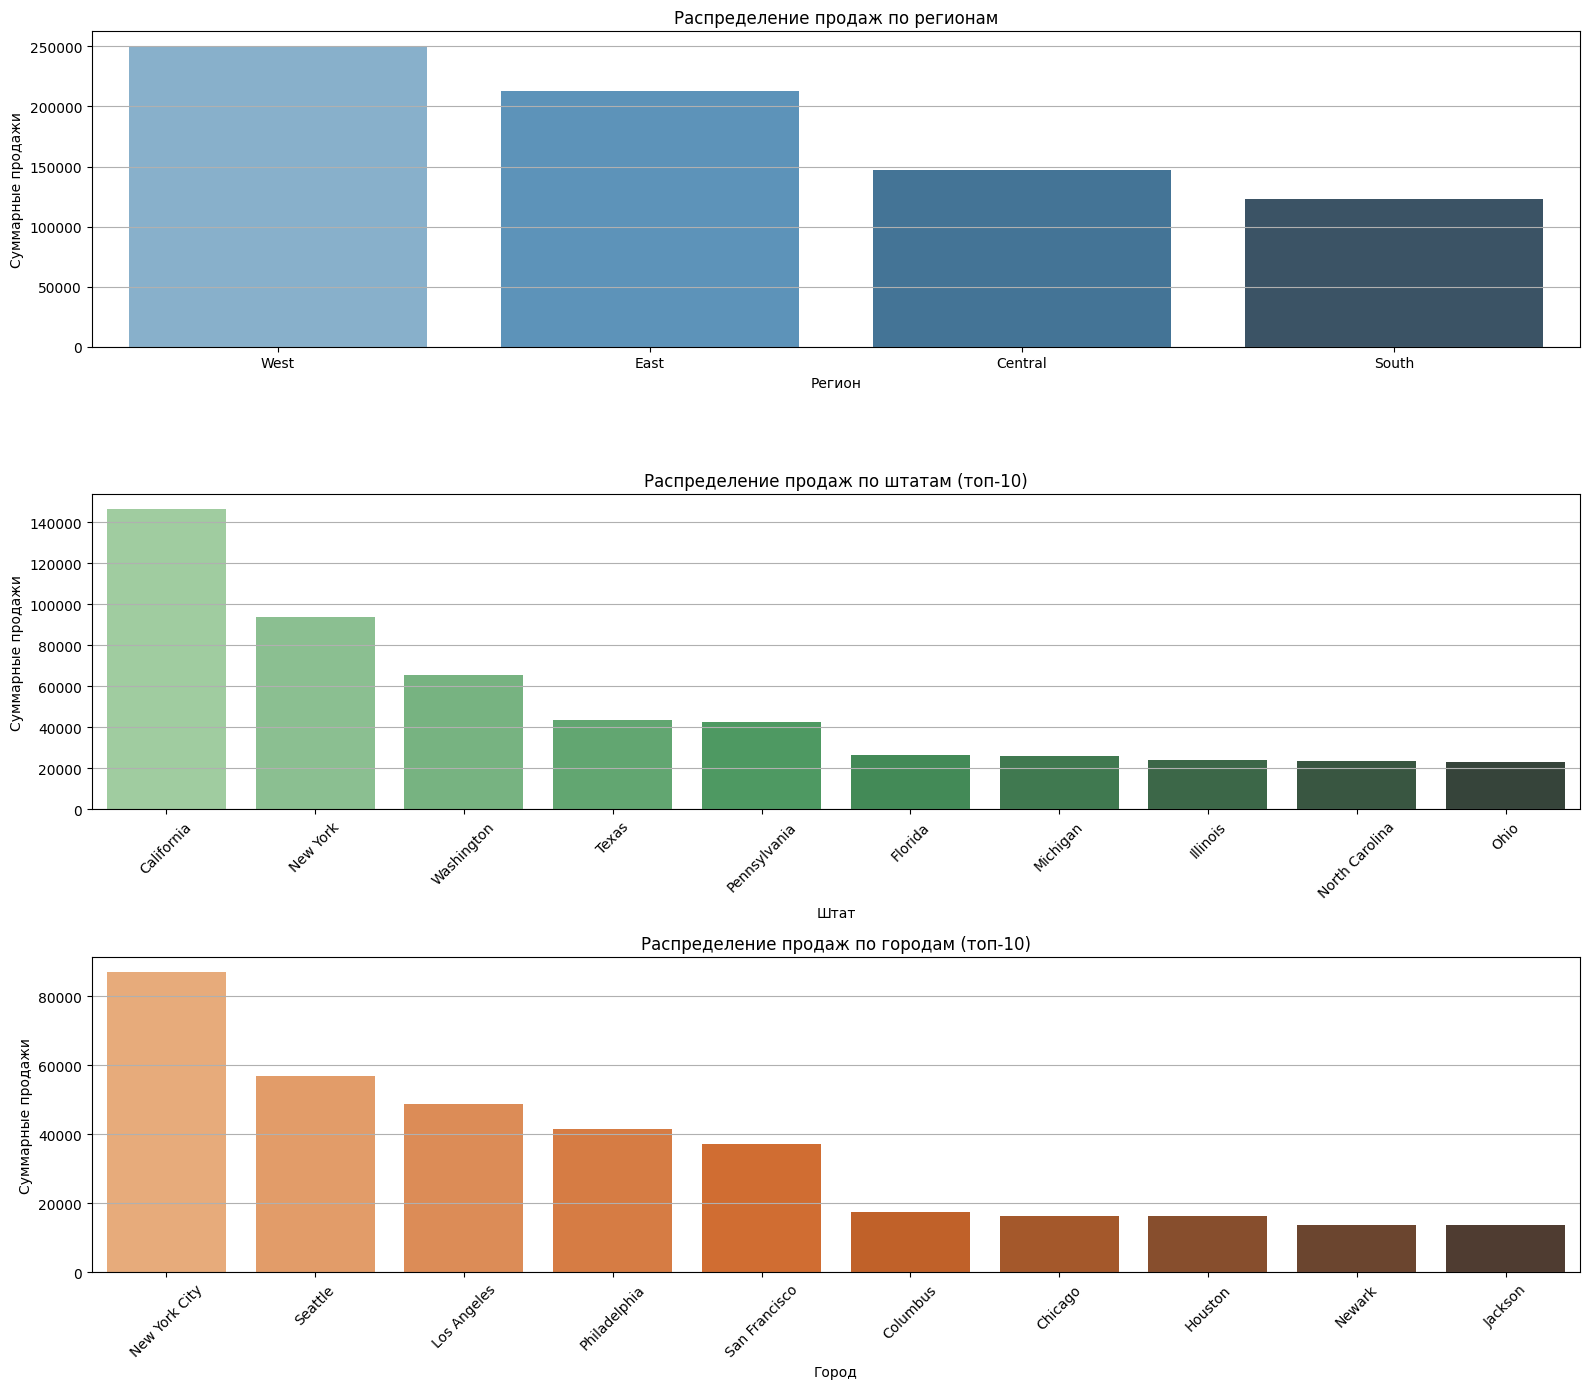

Комментарий:
1. Лидирующий регион по продажам: 'West' (сумма продаж: 250128.37).
2. Регион с наименьшими продажами: 'South' (сумма продаж: 122905.86).
3. Лидирующий штат по продажам: 'California' (сумма продаж: 146388.34).
4. Штат с наименьшими продажами: 'District of Columbia' (сумма продаж: 77.76).
5. Лидирующий город по продажам: 'New York City' (сумма продаж: 86939.60).
6. Город с наименьшими продажами: 'Abilene' (сумма продаж: 1.39).
Закономерности:
- Регион 'West' лидирует по продажам, возможно из-за высокой плотности населения или экономической активности.
- В большинстве случаев штаты и города из лидирующего региона также находятся в топе по продажам.
- Города с низкими продажами могут быть расположены в регионах с меньшей экономической активностью.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Преобразование 'sales' в числовой тип
amazon_df['sales'] = pd.to_numeric(amazon_df['sales'], errors='coerce')

# Группировка данных и суммирование продаж
city_sales = amazon_df.groupby('city')['sales'].sum().sort_values(ascending=False)
state_sales = amazon_df.groupby('state')['sales'].sum().sort_values(ascending=False)
region_sales = amazon_df.groupby('region')['sales'].sum().sort_values(ascending=False)

# Построение графиков
plt.figure(figsize=(16, 14))

# График для регионов
plt.subplot(3, 1, 1)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='Blues_d')
plt.title('Распределение продаж по регионам')
plt.xlabel('Регион')
plt.ylabel('Суммарные продажи')
plt.grid(axis='y')

# График для штатов (топ-10 для наглядности)
plt.subplot(3, 1, 2)
top_states = state_sales.head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette='Greens_d')
plt.title('Распределение продаж по штатам (топ-10)')
plt.xlabel('Штат')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

# График для городов (топ-10 для наглядности)
plt.subplot(3, 1, 3)
top_cities = city_sales.head(10)
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Oranges_d')
plt.title('Распределение продаж по городам (топ-10)')
plt.xlabel('Город')
plt.ylabel('Суммарные продажи')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

# Анализ данных
top_region = region_sales.idxmax()
bottom_region = region_sales.idxmin()

top_state = state_sales.idxmax()
bottom_state = state_sales.idxmin()

top_city = city_sales.idxmax()
bottom_city = city_sales.idxmin()

print(f"Комментарий:")
print(f"1. Лидирующий регион по продажам: '{top_region}' (сумма продаж: {region_sales[top_region]:.2f}).")
print(f"2. Регион с наименьшими продажами: '{bottom_region}' (сумма продаж: {region_sales[bottom_region]:.2f}).")
print(f"3. Лидирующий штат по продажам: '{top_state}' (сумма продаж: {state_sales[top_state]:.2f}).")
print(f"4. Штат с наименьшими продажами: '{bottom_state}' (сумма продаж: {state_sales[bottom_state]:.2f}).")
print(f"5. Лидирующий город по продажам: '{top_city}' (сумма продаж: {city_sales[top_city]:.2f}).")
print(f"6. Город с наименьшими продажами: '{bottom_city}' (сумма продаж: {city_sales[bottom_city]:.2f}).")
print(f"Закономерности:")
print(f"- Регион '{top_region}' лидирует по продажам, возможно из-за высокой плотности населения или экономической активности.")
print(f"- В большинстве случаев штаты и города из лидирующего региона также находятся в топе по продажам.")
print(f"- Города с низкими продажами могут быть расположены в регионах с меньшей экономической активностью.")

<ipython-input-15-810fa775498e>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")


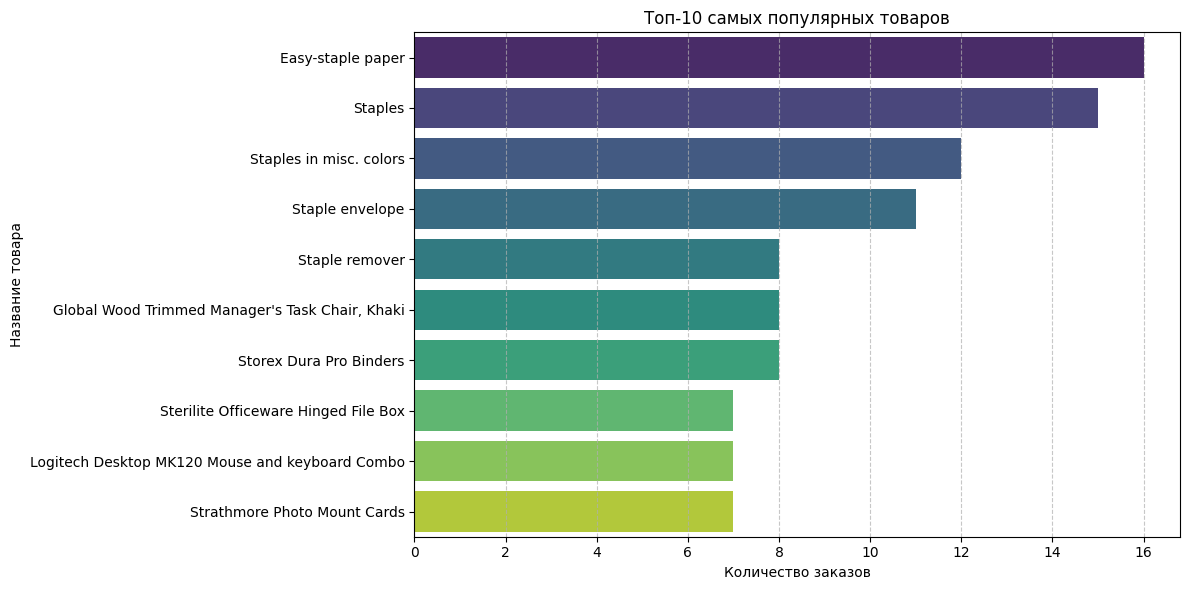

Топ-10 самых популярных товаров:
productname
Easy-staple paper                                  16
Staples                                            15
Staples in misc. colors                            12
Staple envelope                                    11
Staple remover                                      8
Global Wood Trimmed Manager's Task Chair, Khaki     8
Storex Dura Pro Binders                             8
Sterilite Officeware Hinged File Box                7
Logitech Desktop MK120 Mouse and keyboard Combo     7
Strathmore Photo Mount Cards                        7
Name: orderid, dtype: int64


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Подсчет количества заказов для каждого товара
popular_products = (
    amazon_df.groupby('productname')['orderid']
    .nunique()
    .sort_values(ascending=False)
)

# Топ-10 самых популярных товаров
top_10_products = popular_products.head(10)

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
plt.title('Топ-10 самых популярных товаров')
plt.xlabel('Количество заказов')
plt.ylabel('Название товара')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Текстовый вывод для топ-10
print("Топ-10 самых популярных товаров:")
print(top_10_products)

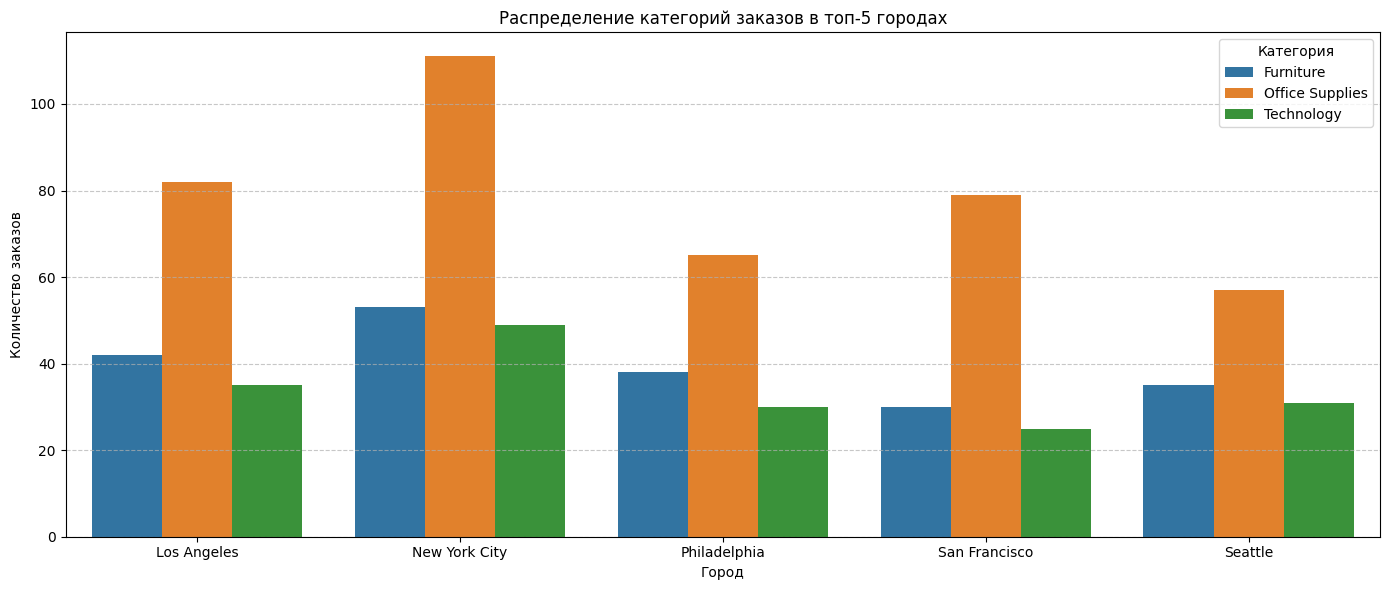

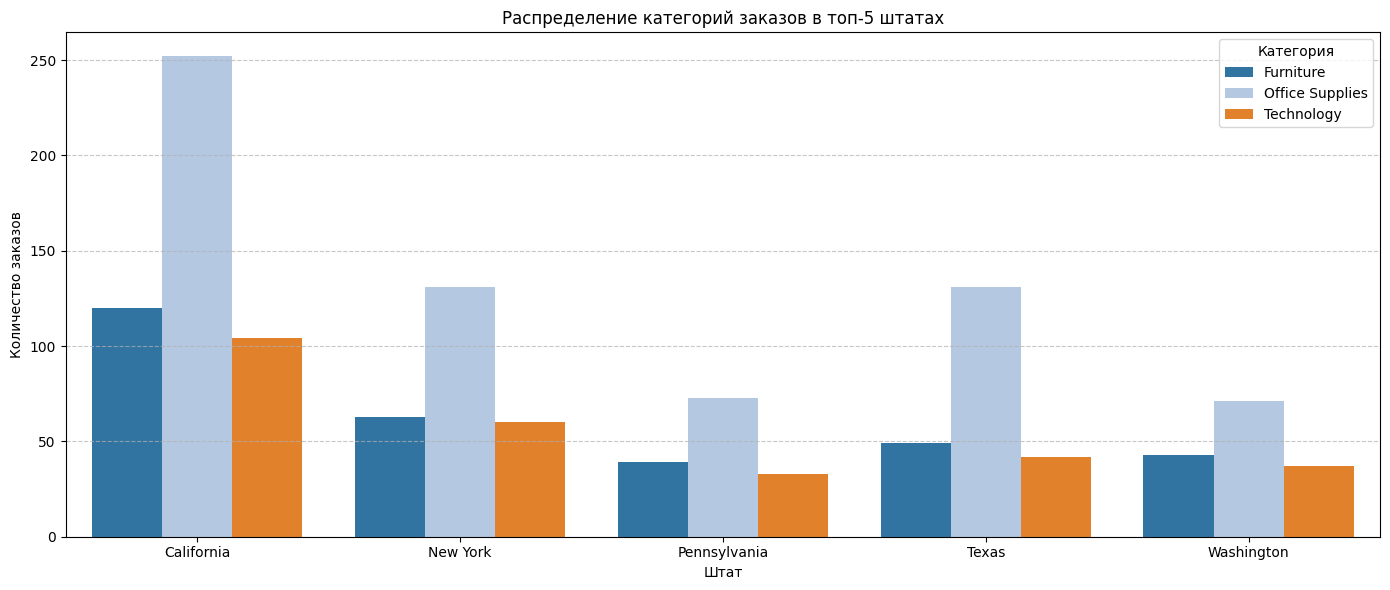

Закономерности:
В штате 'California' больше всего заказывают категорию 'Office Supplies' (заказов: 252).
В штате 'New York' больше всего заказывают категорию 'Office Supplies' (заказов: 131).
В штате 'Texas' больше всего заказывают категорию 'Office Supplies' (заказов: 131).
В штате 'Washington' больше всего заказывают категорию 'Office Supplies' (заказов: 71).
В штате 'Pennsylvania' больше всего заказывают категорию 'Office Supplies' (заказов: 73).
В городе 'New York City' больше всего заказывают категорию 'Office Supplies' (заказов: 111).
В городе 'Los Angeles' больше всего заказывают категорию 'Office Supplies' (заказов: 82).
В городе 'San Francisco' больше всего заказывают категорию 'Office Supplies' (заказов: 79).
В городе 'Philadelphia' больше всего заказывают категорию 'Office Supplies' (заказов: 65).
В городе 'Seattle' больше всего заказывают категорию 'Office Supplies' (заказов: 57).


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Подсчет количества заказов по городам и категориям
city_category_orders = (
    amazon_df.groupby(['city', 'category'])['orderid']
    .nunique()
    .reset_index()
    .rename(columns={'orderid': 'order_count'})
)

# Подсчет количества заказов по штатам и категориям
state_category_orders = (
    amazon_df.groupby(['state', 'category'])['orderid']
    .nunique()
    .reset_index()
    .rename(columns={'orderid': 'order_count'})
)

# Выборка для примера: топ-5 городов с наибольшим количеством заказов
top_cities = city_category_orders.groupby('city')['order_count'].sum().nlargest(5).index
top_cities_data = city_category_orders[city_category_orders['city'].isin(top_cities)]

# Выборка для топ-5 штатов с наибольшим количеством заказов
top_states = state_category_orders.groupby('state')['order_count'].sum().nlargest(5).index
top_states_data = state_category_orders[state_category_orders['state'].isin(top_states)]

# Визуализация для городов
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_cities_data,
    x='city',
    y='order_count',
    hue='category',
    palette='tab10'
)
plt.title('Распределение категорий заказов в топ-5 городах')
plt.xlabel('Город')
plt.ylabel('Количество заказов')
plt.legend(title='Категория')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Визуализация для штатов
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_states_data,
    x='state',
    y='order_count',
    hue='category',
    palette='tab20'
)
plt.title('Распределение категорий заказов в топ-5 штатах')
plt.xlabel('Штат')
plt.ylabel('Количество заказов')
plt.legend(title='Категория')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Вывод данных для анализа
print("Закономерности:")
for state in top_states:
    state_data = state_category_orders[state_category_orders['state'] == state]
    top_category = state_data.sort_values('order_count', ascending=False).iloc[0]
    print(f"В штате '{state}' больше всего заказывают категорию '{top_category['category']}' (заказов: {top_category['order_count']}).")

for city in top_cities:
    city_data = city_category_orders[city_category_orders['city'] == city]
    top_category = city_data.sort_values('order_count', ascending=False).iloc[0]
    print(f"В городе '{city}' больше всего заказывают категорию '{top_category['category']}' (заказов: {top_category['order_count']}).")

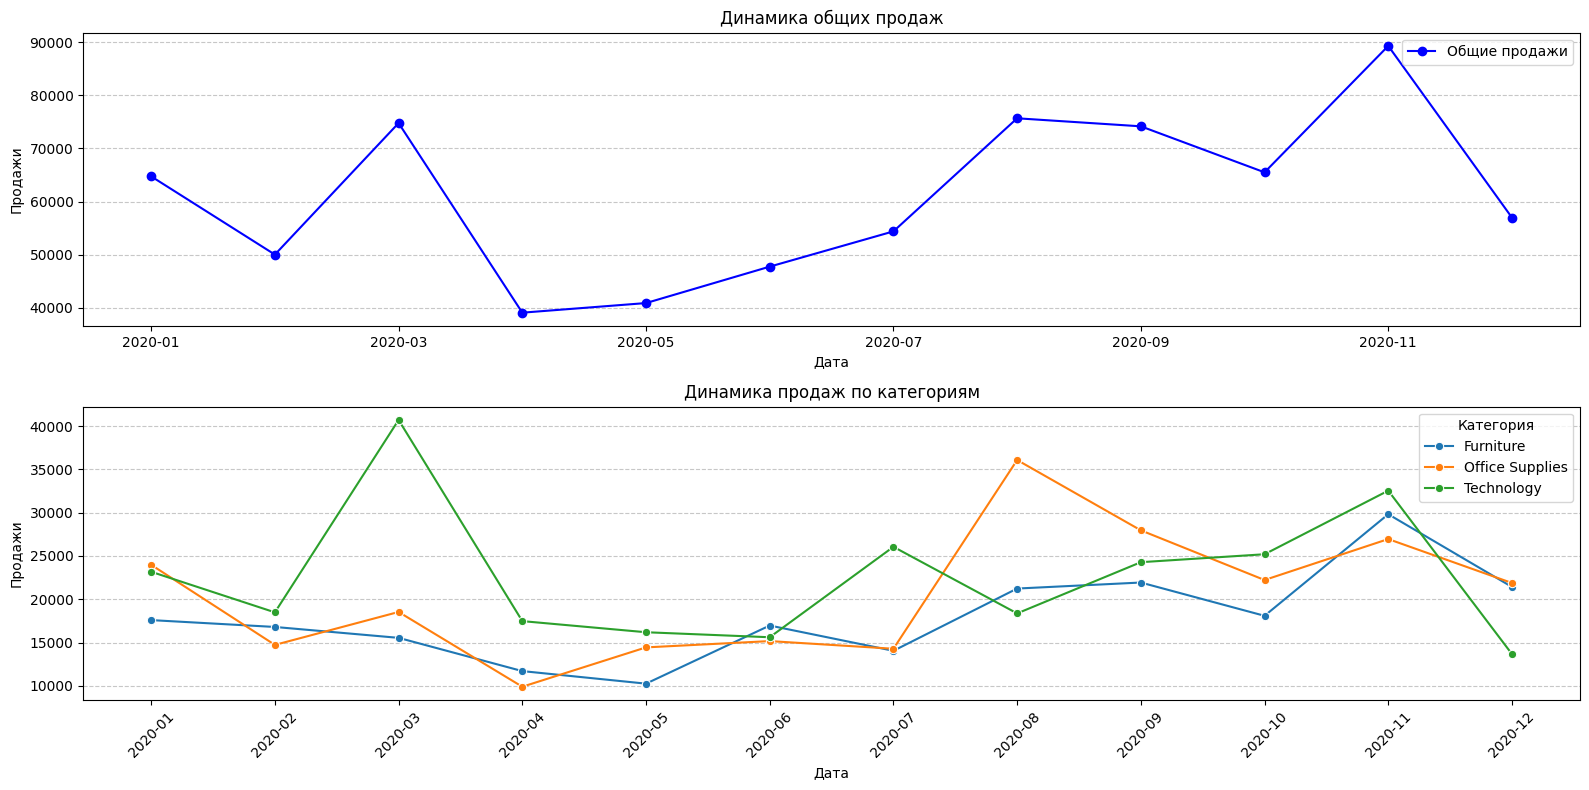

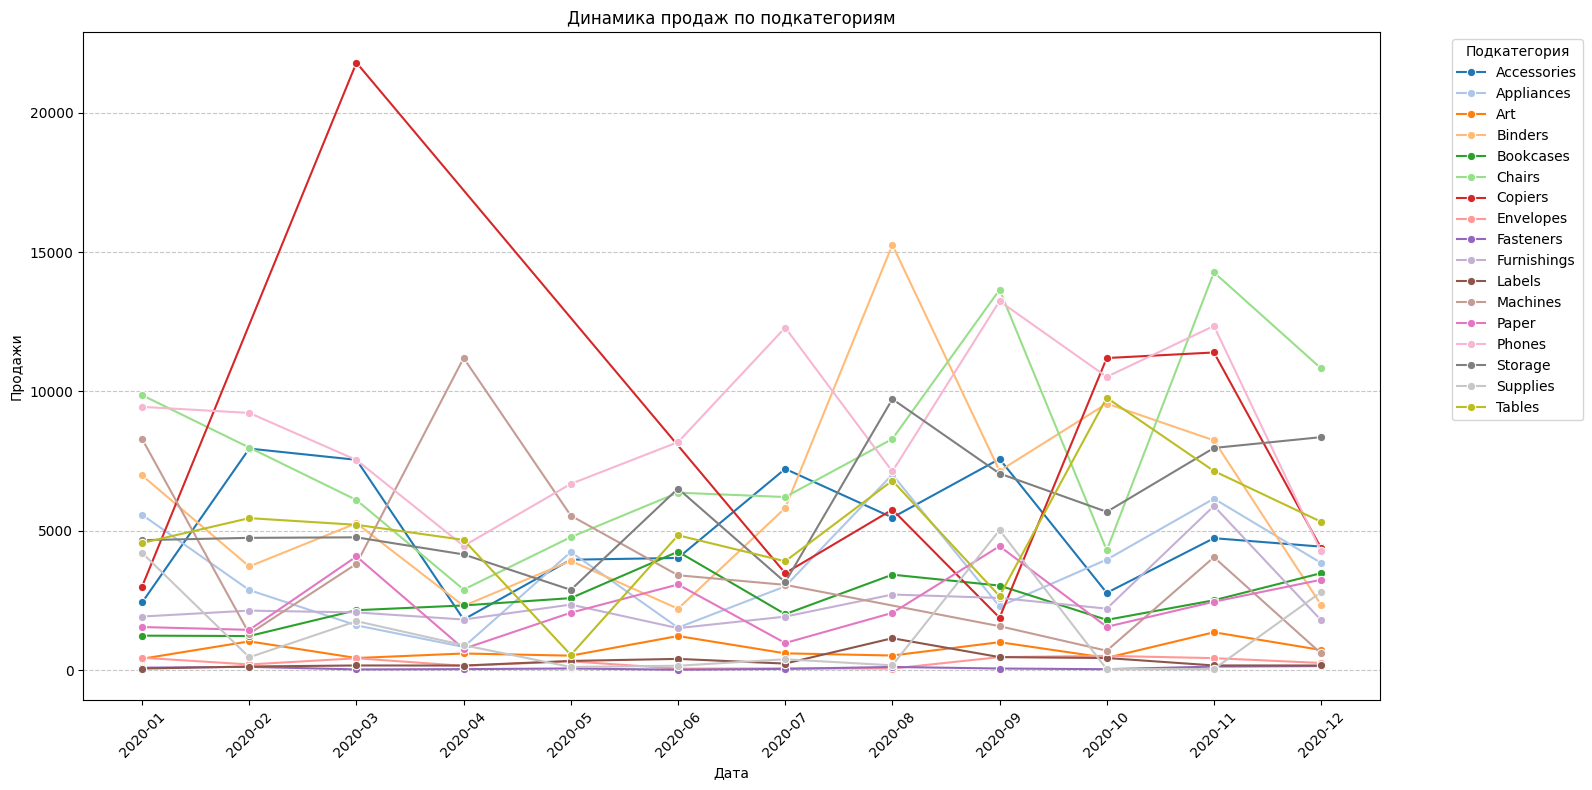

Анализ пиков и спадов:
- Общие продажи достигли пика 2020-11 с суммой 89306.24.
- Минимальные продажи были 2020-04 с суммой 39072.00.
- Категория 'Furniture': пик продаж 2020-11 (сумма: 29817.71), спад 2020-05 (сумма: 10252.85).
- Категория 'Office Supplies': пик продаж 2020-08 (сумма: 36076.82), спад 2020-04 (сумма: 9896.41).
- Категория 'Technology': пик продаж 2020-03 (сумма: 40701.21), спад 2020-12 (сумма: 13670.80).


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Приведение столбцов к нижнему регистру для консистентности
amazon_df.columns = amazon_df.columns.str.lower()

# Преобразование столбца 'orderdate' в формат datetime
amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'], errors='coerce')

# Создание столбца "год-месяц" для агрегации
amazon_df['year_month'] = amazon_df['orderdate'].dt.to_period('M')

# !!! Convert 'year_month' to string for plotting !!!
amazon_df['year_month'] = amazon_df['year_month'].astype(str)


# Суммарные продажи по всем категориям и подкатегориям
overall_sales = amazon_df.groupby('year_month')['sales'].sum()

# Динамика продаж по категориям
category_sales = amazon_df.groupby(['year_month', 'category'])['sales'].sum().reset_index()

# Динамика продаж по подкатегориям
subcategory_sales = amazon_df.groupby(['year_month', 'sub-category'])['sales'].sum().reset_index()

# Визуализация динамики продаж по категориям
plt.figure(figsize=(16, 8))

# Общая динамика
plt.subplot(2, 1, 1)
overall_sales.plot(kind='line', marker='o', color='blue', label='Общие продажи')
plt.title('Динамика общих продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Продажи по категориям
plt.subplot(2, 1, 2)
sns.lineplot(
    data=category_sales,
    x='year_month',
    y='sales',
    hue='category',
    marker='o',
    palette='tab10'
)
plt.title('Динамика продаж по категориям')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend(title='Категория')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Визуализация динамики продаж по подкатегориям
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=subcategory_sales,
    x='year_month',
    y='sales',
    hue='sub-category',
    marker='o',
    palette='tab20'
)
plt.title('Динамика продаж по подкатегориям')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend(title='Подкатегория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Анализ пиков и спадов
print("Анализ пиков и спадов:")

# Выявление пиков и спадов в общих продажах
overall_peak_date = overall_sales.idxmax()
overall_min_date = overall_sales.idxmin()

print(f"- Общие продажи достигли пика {overall_peak_date} с суммой {overall_sales.max():.2f}.")
print(f"- Минимальные продажи были {overall_min_date} с суммой {overall_sales.min():.2f}.")

# Анализ по категориям
category_peaks = category_sales.groupby('category')['sales'].idxmax()
category_lows = category_sales.groupby('category')['sales'].idxmin()

for category, peak_idx in category_peaks.items():
    peak_date = category_sales.loc[peak_idx, 'year_month']
    peak_sales = category_sales.loc[peak_idx, 'sales']
    low_idx = category_lows[category]
    low_date = category_sales.loc[low_idx, 'year_month']
    low_sales = category_sales.loc[low_idx, 'sales']
    print(f"- Категория '{category}': пик продаж {peak_date} (сумма: {peak_sales:.2f}), спад {low_date} (сумма: {low_sales:.2f}).")

**ВЫВОДЫ**

Количество уникальных заказов: 1687

Количество уникальных клиентов: 693

Больше всего заказов поступает из региона 'West', меньше всего — из региона 'South'.

Штат с наибольшим количеством заказов — 'California'.

Город с наибольшим количеством заказов — 'New York City'.

Месяц с наибольшим количеством заказов: 2020-09 (385 заказов).

Месяц с наименьшим количеством заказов: 2020-01 (226 заказов).

Визуально заметно рост количества заказов в течение рассматриваемого периода.

Месяц с наибольшей суммой продаж: 2020-11 (сумма продаж: 89306.24).

Месяц с наименьшей суммой продаж: 2020-04 (сумма продаж: 39072.00).

Общее поведение продаж показало рост в течение рассматриваемого периода.


Лидирующая категория по продажам: 'Technology' (сумма продаж: 271730.81).

Категория с наименьшими продажами: 'Furniture' (сумма продаж: 215387.27).

Лидирующая подкатегория по продажам: 'Phones' (сумма продаж: 105340.52).

Подкатегория с наименьшими продажами: 'Fasteners' (сумма продаж: 857.59).

Лидирующий регион по продажам: 'West' (сумма продаж: 250128.37).

Регион с наименьшими продажами: 'South' (сумма продаж: 122905.86).

Лидирующий штат по продажам: 'California' (сумма продаж: 146388.34).

Штат с наименьшими продажами: 'District of Columbia' (сумма продаж: 77.76).

Лидирующий город по продажам: 'New York City' (сумма продаж: 86939.60).

Город с наименьшими продажами: 'Abilene' (сумма продаж: 1.39).


Закономерности:
- Регион 'West' лидирует по продажам, возможно из-за высокой плотности населения или экономической активности.
- В большинстве случаев штаты и города из лидирующего региона также находятся в топе по продажам.
- Города с низкими продажами могут быть расположены в регионах с меньшей экономической активностью.

Топ-10 самых популярных товаров:

Easy-staple paper                                  16

Staples                                            15

Staples in misc. colors                            12

Staple envelope                                    11

Staple remover                                      8

Global Wood Trimmed Manager's Task Chair, Khaki     8

Storex Dura Pro Binders                             8

Sterilite Officeware Hinged File Box                7

Logitech Desktop MK120 Mouse and keyboard Combo     7

Strathmore Photo Mount Cards                        7


В штате 'California' больше всего заказывают категорию 'Office Supplies' (заказов: 252).

В штате 'New York' больше всего заказывают категорию 'Office Supplies' (заказов: 131).

В штате 'Texas' больше всего заказывают категорию 'Office Supplies' (заказов: 131).

В штате 'Washington' больше всего заказывают категорию 'Office Supplies' (заказов: 71).

В штате 'Pennsylvania' больше всего заказывают категорию 'Office Supplies' (заказов: 73).

В городе 'New York City' больше всего заказывают категорию 'Office Supplies' (заказов: 111).

В городе 'Los Angeles' больше всего заказывают категорию 'Office Supplies' (заказов: 82).

В городе 'San Francisco' больше всего заказывают категорию 'Office Supplies' (заказов: 79).

В городе 'Philadelphia' больше всего заказывают категорию 'Office Supplies' (заказов: 65).

В городе 'Seattle' больше всего заказывают категорию 'Office Supplies' (заказов: 57).


Общие продажи достигли пика 2020-11 с суммой 89306.24.

- Минимальные продажи были 2020-04 с суммой 39072.00.

- Категория 'Furniture':

пик продаж 2020-11 (сумма: 29817.71),

спад 2020-05 (сумма: 10252.85).

- Категория 'Office Supplies':

пик продаж 2020-08 (сумма: 36076.82),

спад 2020-04 (сумма: 9896.41).

- Категория 'Technology':

пик продаж 2020-03 (сумма: 40701.21),

спад 2020-12 (сумма: 13670.80).


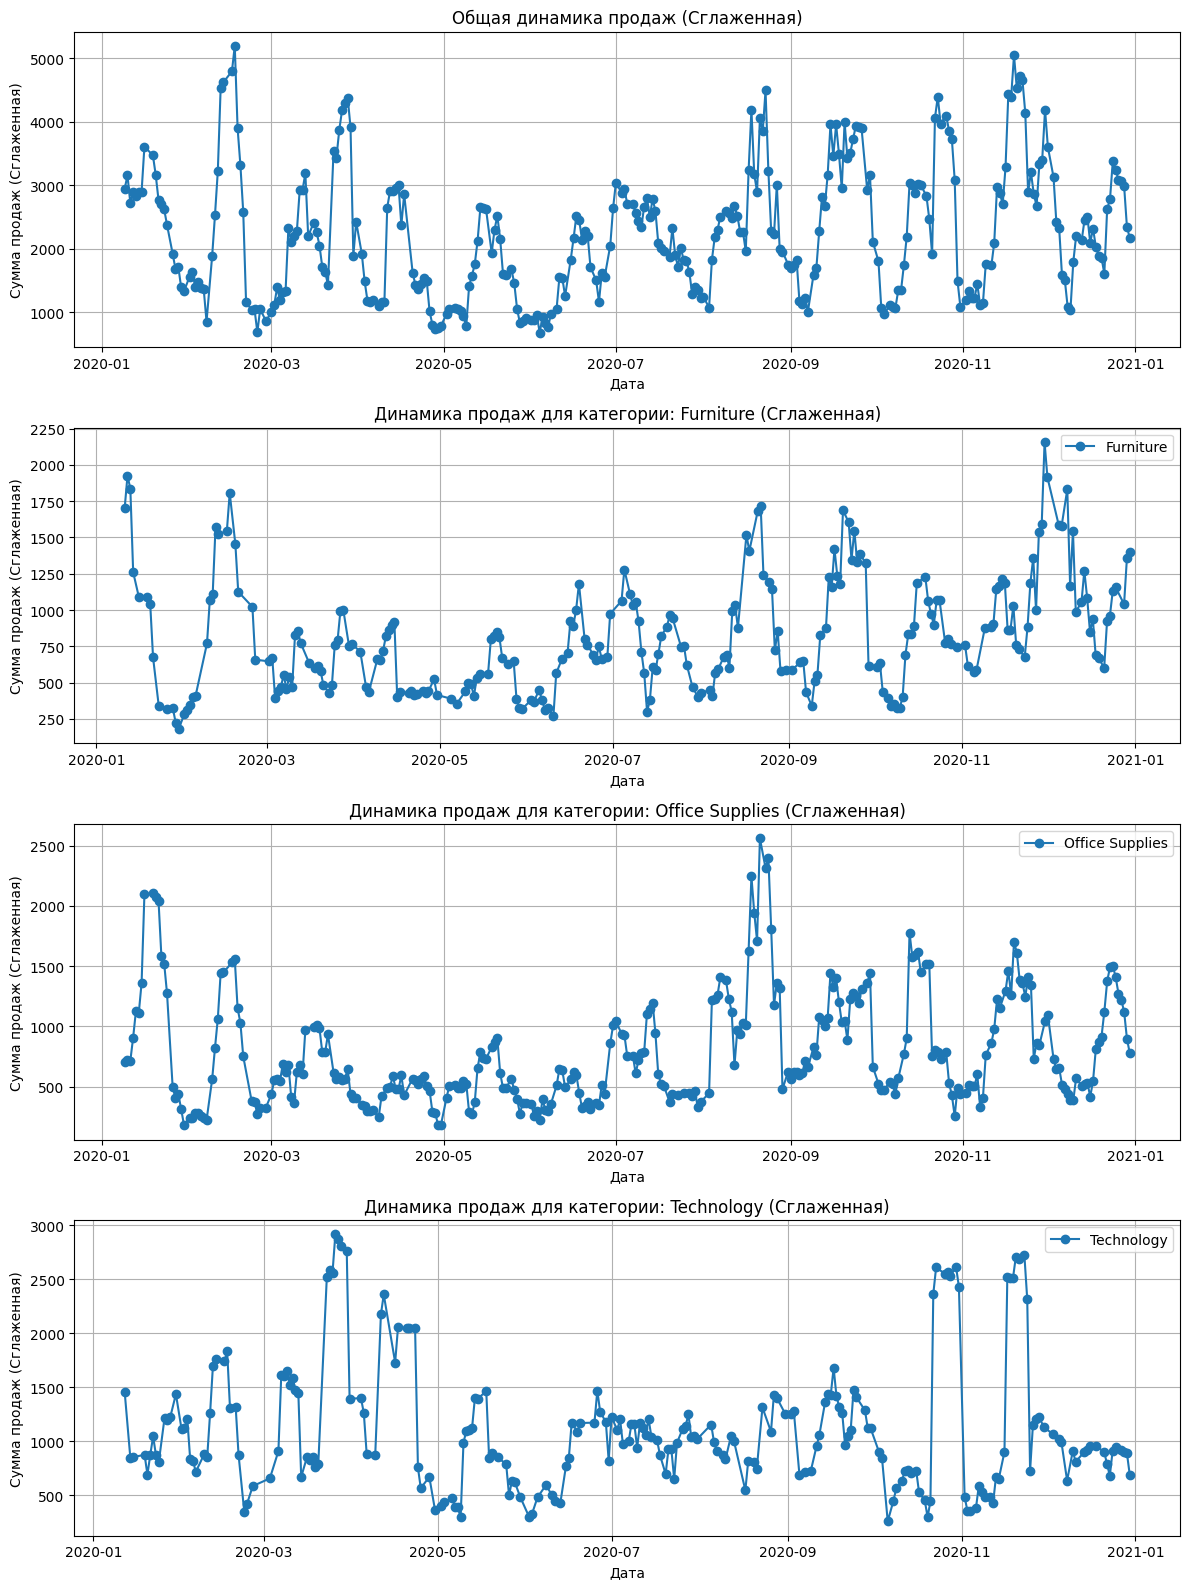

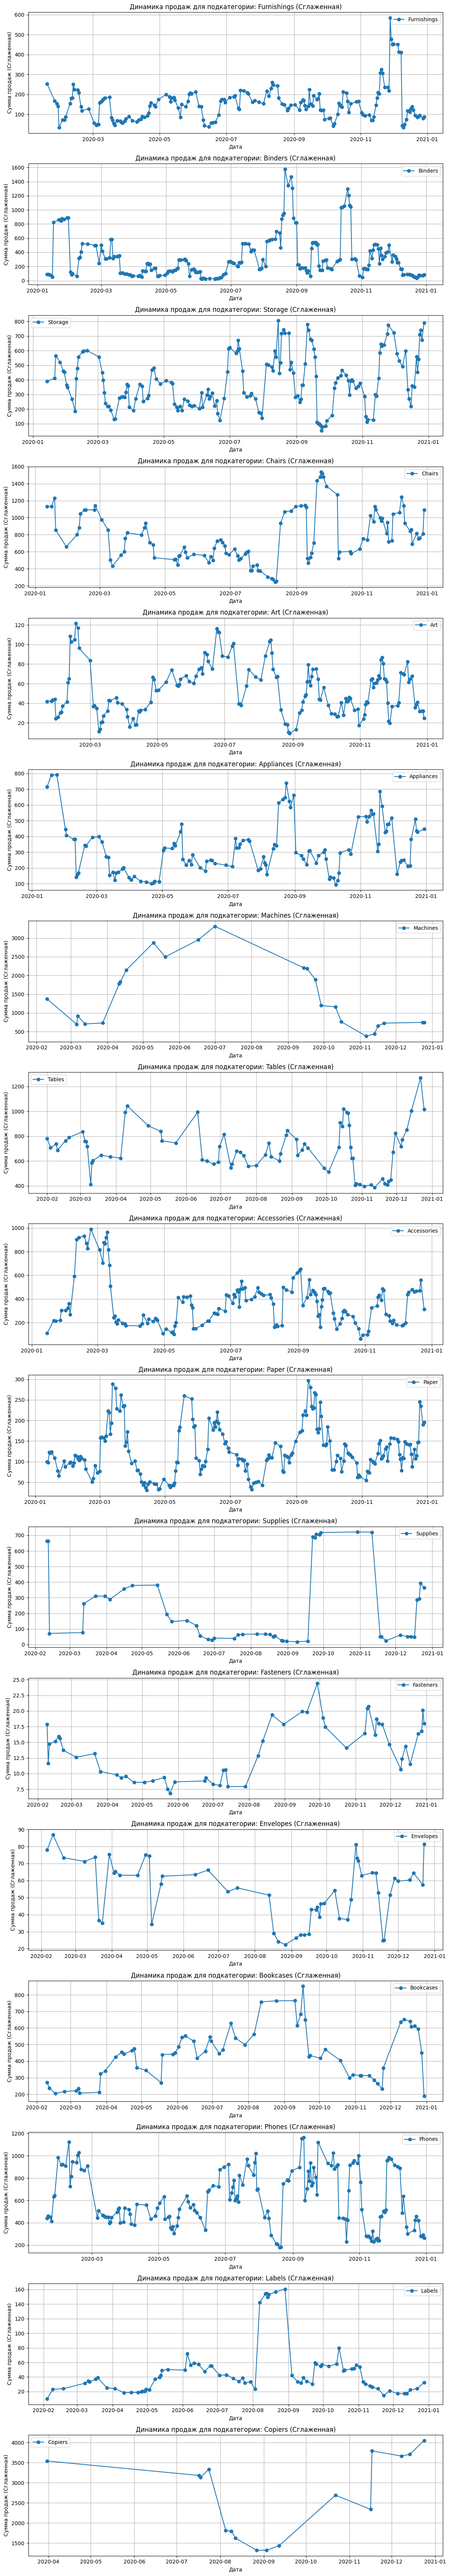

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Предполагаем, что amazon_df уже загружен
# amazon_df = pd.read_csv('path_to_your_file.csv')  # Пример загрузки

# Преобразуем 'orderdate' в формат даты
amazon_df['orderdate'] = pd.to_datetime(amazon_df['orderdate'])

# Группируем по дате и суммируем продажи для общего графика
total_sales_dynamics = amazon_df.groupby('orderdate')['sales'].sum().reset_index()

# Применяем 7-дневное скользящее среднее
total_sales_dynamics['sales_smooth'] = total_sales_dynamics['sales'].rolling(window=7).mean()

# Параметры для графиков
categories = amazon_df['category'].unique()
num_categories = len(categories)
fig, axes = plt.subplots(num_categories + 1, 1, figsize=(12, 4 * (num_categories + 1)))

# Общий график
axes[0].plot(total_sales_dynamics['orderdate'], total_sales_dynamics['sales_smooth'], marker='o')
axes[0].set_title('Общая динамика продаж (Сглаженная)')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Сумма продаж (Сглаженная)')
axes[0].grid()

# Графики для каждой категории
for i, category in enumerate(categories):
    category_data = amazon_df[amazon_df['category'] == category]
    category_sales_dynamics = category_data.groupby('orderdate')['sales'].sum().reset_index()

    # Применяем 7-дневное скользящее среднее
    category_sales_dynamics['sales_smooth'] = category_sales_dynamics['sales'].rolling(window=7).mean()

    axes[i + 1].plot(category_sales_dynamics['orderdate'], category_sales_dynamics['sales_smooth'], marker='o', label=category)
    axes[i + 1].set_title(f'Динамика продаж для категории: {category} (Сглаженная)')
    axes[i + 1].set_xlabel('Дата')
    axes[i + 1].set_ylabel('Сумма продаж (Сглаженная)')
    axes[i + 1].grid()
    axes[i + 1].legend()

plt.tight_layout()
plt.show()

# Анализ подкатегорий
subcategories = amazon_df['sub-category'].unique()
fig, axes = plt.subplots(len(subcategories), 1, figsize=(12, 4 * len(subcategories)))

# Графики для каждой подкатегории
for i, subcategory in enumerate(subcategories):
    subcategory_data = amazon_df[amazon_df['sub-category'] == subcategory]
    subcategory_sales_dynamics = subcategory_data.groupby('orderdate')['sales'].sum().reset_index()

    # Применяем 7-дневное скользящее среднее
    subcategory_sales_dynamics['sales_smooth'] = subcategory_sales_dynamics['sales'].rolling(window=7).mean()

    axes[i].plot(subcategory_sales_dynamics['orderdate'], subcategory_sales_dynamics['sales_smooth'], marker='o', label=subcategory)
    axes[i].set_title(f'Динамика продаж для подкатегории: {subcategory} (Сглаженная)')
    axes[i].set_xlabel('Дата')
    axes[i].set_ylabel('Сумма продаж (Сглаженная)')
    axes[i].grid()
    axes[i].legend()

plt.tight_layout()
plt.show()